In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [176]:
df = pd.read_csv("train.csv")
df.rename(columns={"x" : "House Size"} , inplace=True)
df.rename(columns={"y" : "Price"} , inplace=True)


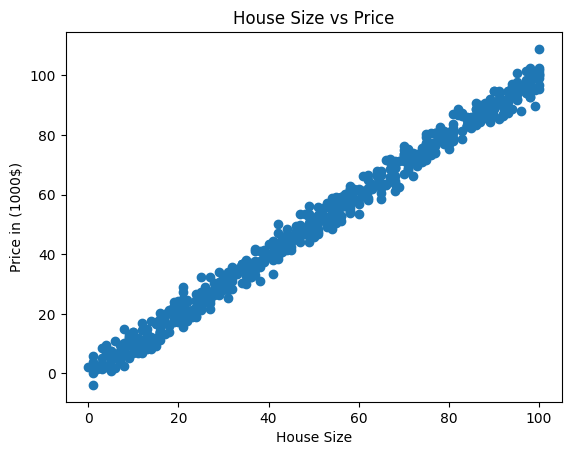

In [177]:
plt.scatter(df["House Size"] , df['Price'])
plt.title("House Size vs Price")
plt.xlabel("House Size")
plt.ylabel("Price in (1000$)")
plt.show()

In [178]:
#loading the data set
x_train = np.array(df['House Size'])    #House Size
y_train = np.array(df['Price'])         #House Price


In [179]:
#Cost Function Calculation

def calculate_cost(x , y , w , b):
    m = x.shape[0]
    total_cost = 0

    cost = 0

    for i in range (m):
        f_wb = w * x[i] + b
        cost +=  (f_wb - y[i])**2

    total_cost = cost/(2*m)
    return total_cost
    

In [180]:
#Computing Gradient
def compute_gradient(x , y , w , b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    dj_db_i = 0
    dj_dw_i = 0
    for i in range (m):
        f_wb = w * x[i] + b
        
        dj_dw_i += (f_wb - y[i]) * x[i]
        dj_db_i += (f_wb - y[i])

       
    
    dj_dw= dj_dw_i/m
    dj_db = dj_db_i/m

    return dj_dw , dj_db

print(compute_gradient(x_train , y_train , 2 , 1))

(3450.85723097681, 51.90855637718342)


In [181]:
#Gradient Descent Algorithm
def gradient_descent(x , y , w_in , b_in , iter , cost_calc , gradient_calc , learning_rate):

    w = w_in
    b = b_in

    J_hist = []
    w_hist = []
    b_hist = []
    iter_hist = []
    
    for i in range (iter):
        if i%10 == 0:
            J_hist.append(cost_calc(x , y , w , b))
            w_hist.append(w)
            b_hist.append(b)
            iter_hist.append(i)

        

        dj_dw , dj_db = gradient_calc(x , y , w , b)

        w = w - learning_rate * dj_dw
        b = b -  learning_rate * dj_db

    
    return w , b , J_hist , w_hist , b_hist , iter_hist
    


In [204]:
w_final , b_final , J_list , w_list , b_list , iter_list = gradient_descent(x_train , y_train , 0 , 0 , 1000, calculate_cost , compute_gradient , 0.00001)

Text(0, 0.5, 'Cost')

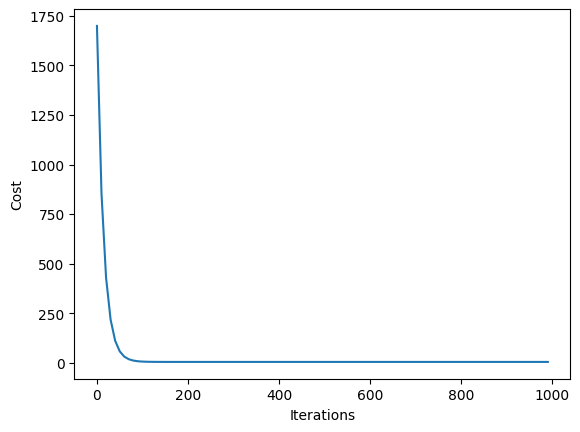

In [205]:
plt.plot(iter_list, J_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")


In [206]:
w_final , b_final

(0.9988522312444675, 0.014982648711942579)

In [207]:
predictions = []
m = x_train.shape[0]

for i in range (m):
    predictions.append(w_final * x_train[i] + b_final)




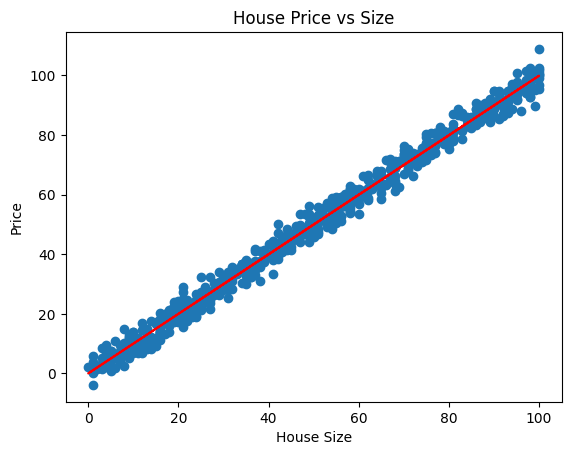

In [208]:
plt.scatter(x_train , y_train)
plt.plot(x_train , predictions , color="red")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("House Price vs Size")
plt.show()
